## Step 1:We import the libraries that we'll be using(for now)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Inspecting and cleaning the dataset

In [5]:
data = pd.read_csv('bank.csv')
data.head(30)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [4]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='Count'>

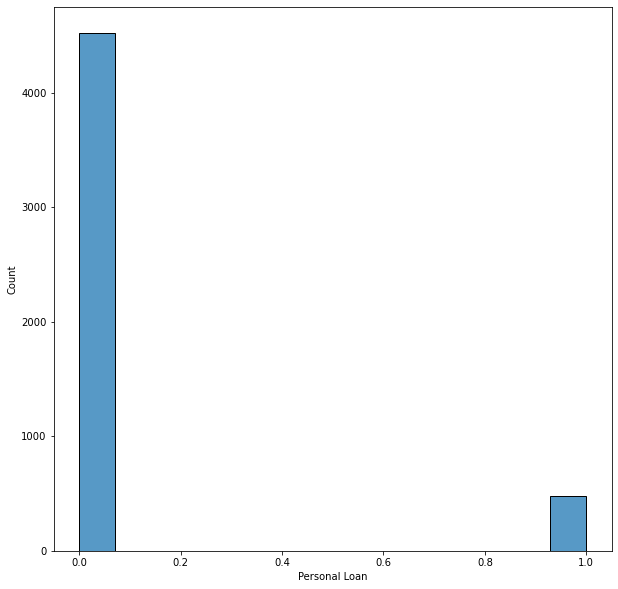

In [18]:
plt.figure(figsize = (10,10))
sns.histplot(data['Personal Loan'])

### The column entitled 'Personal Loan' is the dependent variable for our project, so we must separate it from the rest
### of the columns which in this analysis are dependent variables.


In [39]:
data.head()   #We won't be needing ID and ZIP code for this analysis

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [38]:
data.drop(columns = ['ID','ZIP Code'], inplace = True)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


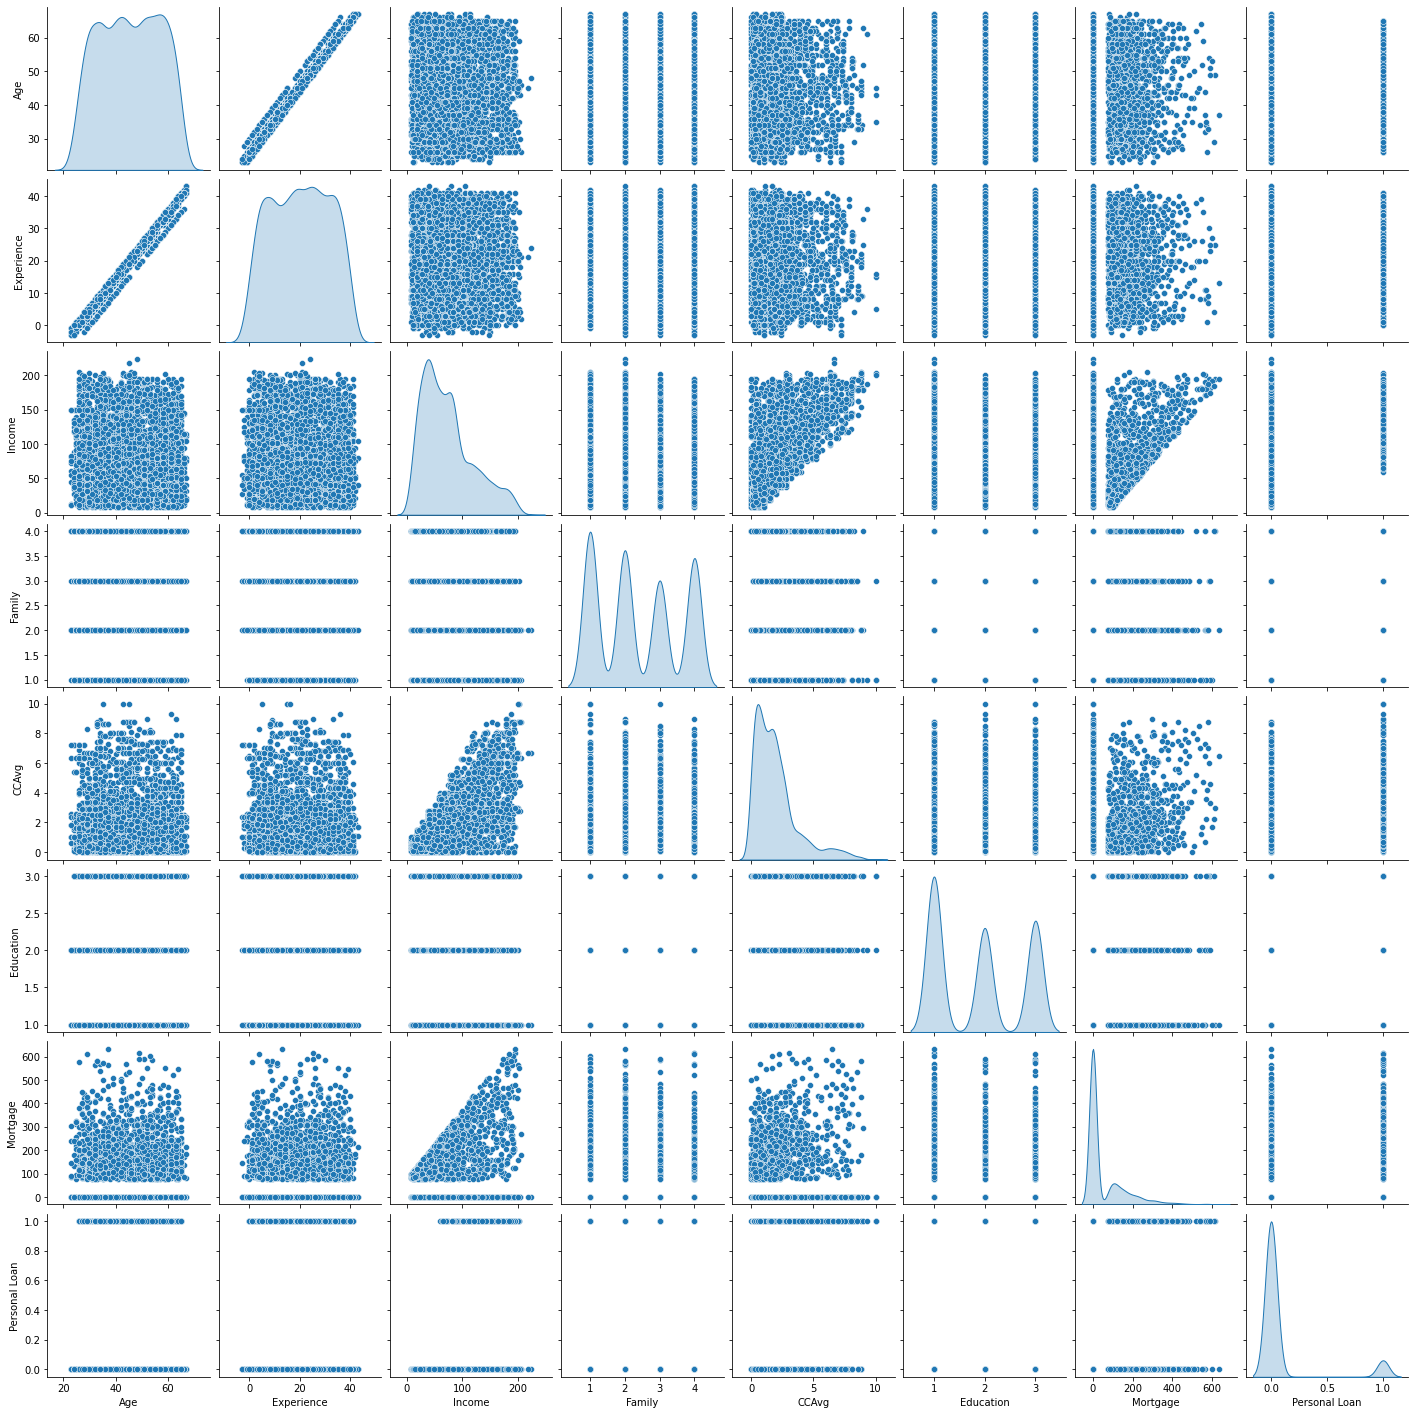

In [40]:
analysis = data.iloc[:,:8]
sns.pairplot(analysis,diag_kind = 'kde')  #This is a really useful function that helps us understand the correlation between features

### My personal comments on this representation


We can see that the average client is aged between 40-60 years old,the correlation between age and experience is a strong positive one(as we would expect).
What is a bit surprising to me is that there isn't a very strong correlation between age and income, however this can be understandable due to the fact that the mean age is around 40-50 years.
A final important conclusion is that the education is relatively limited around the customers,considering that most of them have a low level of education.Let's check the correlation between Education and Personal Loan!

In [30]:
data['Personal Loan'].corr(data['Education'])

0.13672155003028083

### It appears the two don't have a strong correlation.Another great way of visualising the correlation between attributes is:

<AxesSubplot:>

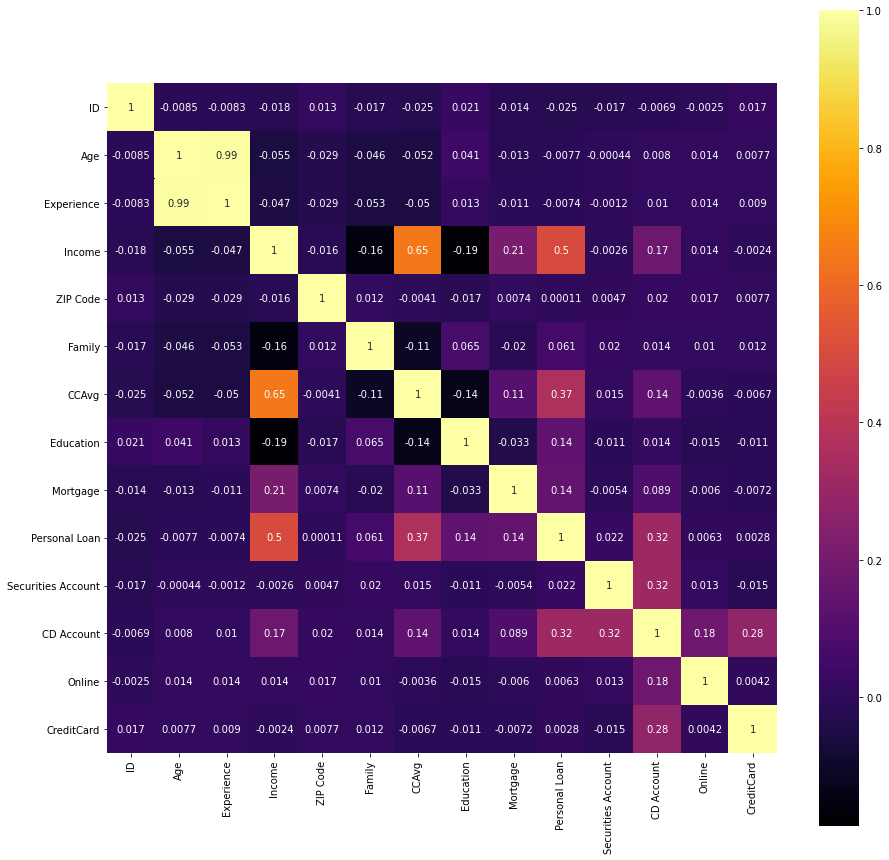

In [36]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap = 'inferno', square = True, vmax = 1,annot = True)

# Step 3 : Splitting data into train and test

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop('Personal Loan', axis = 1)
y = data['Personal Loan']

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Step 4: Building the Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression

Logi = LogisticRegression(solver = 'liblinear')
Logi.fit(x_train,y_train)

print(Logi.score(x_test,y_test))


0.9453333333333334


In [53]:
from sklearn import metrics

prediction = Logi.predict(x_test)

Matrix = metrics.confusion_matrix(y_test,prediction)
print(Matrix)

[[1333   18]
 [  64   85]]


<AxesSubplot:>

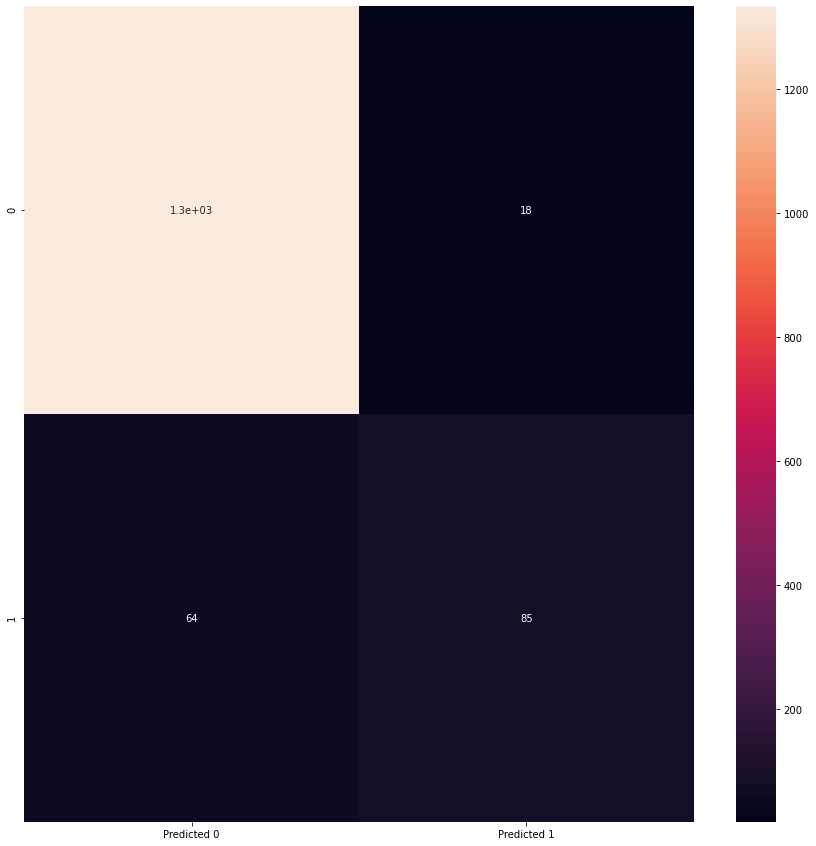

In [57]:
UltimateFormMatrix = pd.DataFrame(Matrix, index = [i for i in ['0','1']], columns = [i for i in ['Predicted 0','Predicted 1']])
plt.figure(figsize = (15,15))
sns.heatmap(UltimateFormMatrix, annot = True)

# Logistic Regression score ====> 94.5 %

# Step 5: Building the Naive Bayes model

In [58]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

In [60]:
nb_model.fit(x_train,y_train)
nb_model.score(x_test,y_test)

0.8746666666666667

In [65]:
prediction = nb_model.predict(x_test)
matrix = metrics.confusion_matrix(y_test,prediction)
print(matrix)

[[1228  123]
 [  65   84]]


<AxesSubplot:>

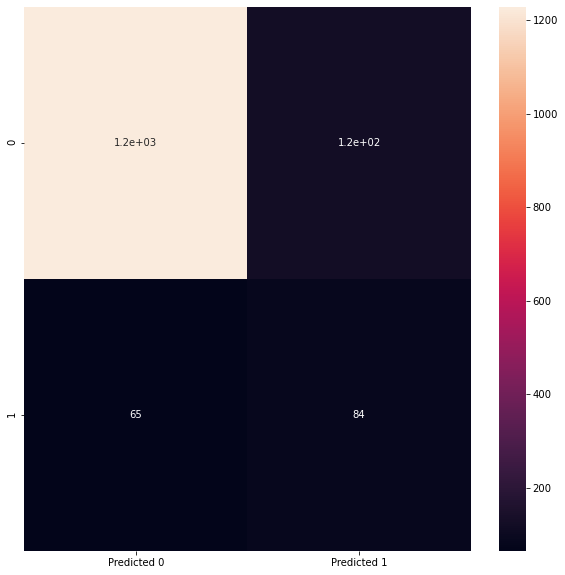

In [66]:
plt.figure(figsize = (10,10))
UltimateMatrix = pd.DataFrame(matrix, index = [i for i in ['0','1']], columns = [i for i in ['Predicted 0','Predicted 1']])
sns.heatmap(UltimateMatrix, annot = True)


# Naive Bayes score ====> 87.4%

# Step 6: Building the KNN Model

In [74]:
from sklearn.neighbors import KNeighborsClassifier


In [75]:
from sklearn.model_selection import cross_val_score

MyModelPredictions = []

for i in range(1,50):
    
    
    Model =  KNeighborsClassifier(n_neighbors = i)  # k hyperparameter tuning
    score = cross_val_score(Model,X,y, cv =10)
    MyModelPredictions.append(score.mean())



Text(0, 0.5, 'Accuracy Rate')

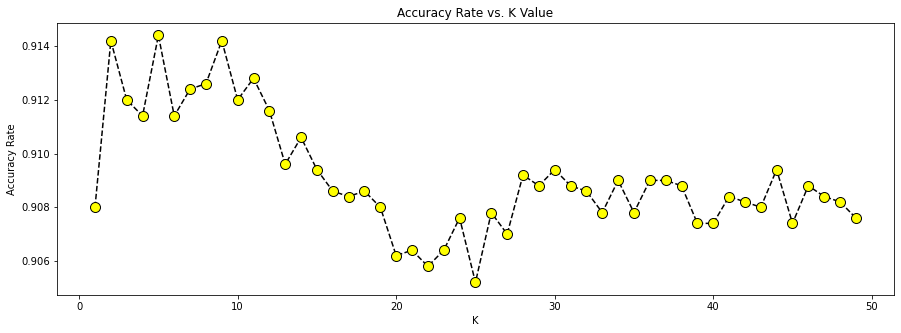

In [98]:
plt.figure(figsize = (15,5))
plt.plot(range(1,50), MyModelPredictions,color='black', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate') 

## We can observe that the best accuracy would be obtained for k = 3 or k = 5 and the best accuracy we can get is 0.914

# KNN score =====> 91.4%

# Step 7: Conclusions

# 1. Logistic Regression ===> 94.5%
# 2. KNN ===================> 91.4%
# 3. Naive-Bayes ===========> 87.4%

## In conclusion,the best performing model on this particular problem is the logistic regression because it gives us better precision than the other two!